In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
import kagglehub
path = kagglehub.dataset_download("uciml/ct-slice-localization")
print("Path to dataset files:", path)

100%|██████████| 17.8M/17.8M [00:00<00:00, 162MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/ct-slice-localization/versions/1


In [3]:
df=pd.read_csv("/root/.cache/kagglehub/datasets/uciml/ct-slice-localization/versions/1/slice_localization_data.csv")
df.head()

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348


In [4]:
df=df.drop("patientId",axis=1)
y=df["reference"]
x=df.drop("reference",axis=1)

In [5]:
x.shape

(53500, 384)

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [7]:
input=layers.Input(shape=(384,))
x=layers.Dense(64,activation="relu")(input)
x=layers.Dense(32,activation="relu")(x)
output=layers.Dense(1,activation="linear")(x)
model=Model(input,output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,753 (104.50 KB)

 Trainable params: 26,753 (104.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer="adam",loss="mae")
history=model.fit(xtrain,ytrain,validation_split=0.2,epochs=50,batch_size=32,callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ])

Epoch 1/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14.9253 - val_loss: 3.5600
Epoch 2/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.9427 - val_loss: 2.5947
Epoch 3/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0087 - val_loss: 1.7209
Epoch 4/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6095 - val_loss: 1.5988
Epoch 5/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4668 - val_loss: 1.3956
Epoch 6/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3237 - val_loss: 1.3603
Epoch 7/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2106 - val_loss: 1.2380
Epoch 8/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1538 - val_loss: 1.1807
Epoch 9/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.1081 - val_loss: 1.3754
Epoch 10/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0335 - val_loss: 1.1318
Epoch 11/50
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0173 - val_loss: 1.0218
Epoch 12/50
1070/1070 ━━━━━━━

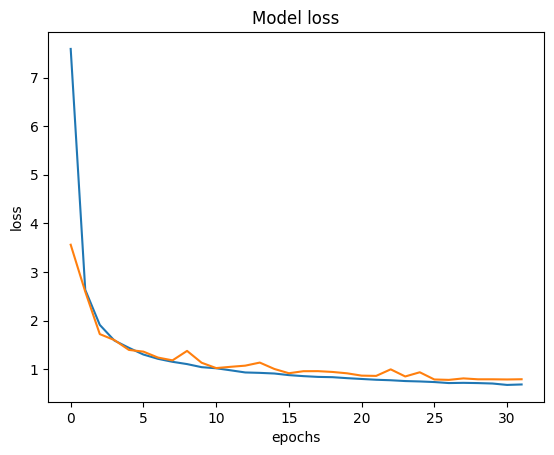

In [9]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Model loss")
plt.show()

In [15]:
y_pred = model.predict(xtest).flatten()
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

335/335 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
MAE: 0.7880
MSE: 2.3445
RMSE: 1.5312
R² Score: 0.9953


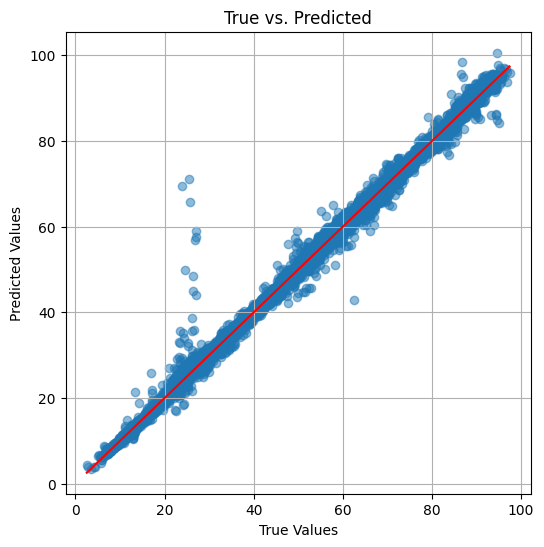

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(ytest, y_pred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted")
plt.grid(True)
plt.show()